In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## Import Dataset

In [4]:
df=pd.read_csv('C:/Users/manov/Downloads/Sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# EDA Process

### Summary Statistics

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#Checking null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

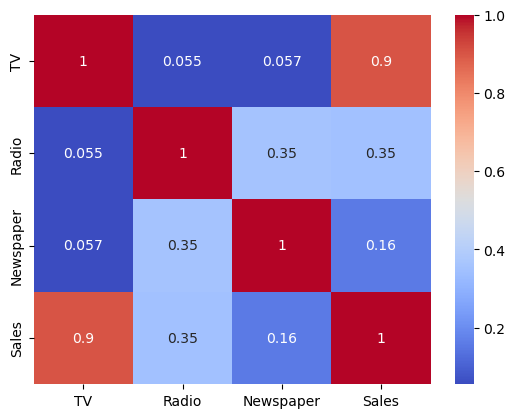

In [7]:
#correlation matrix
import seaborn as sns

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

C:\Users\manov\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


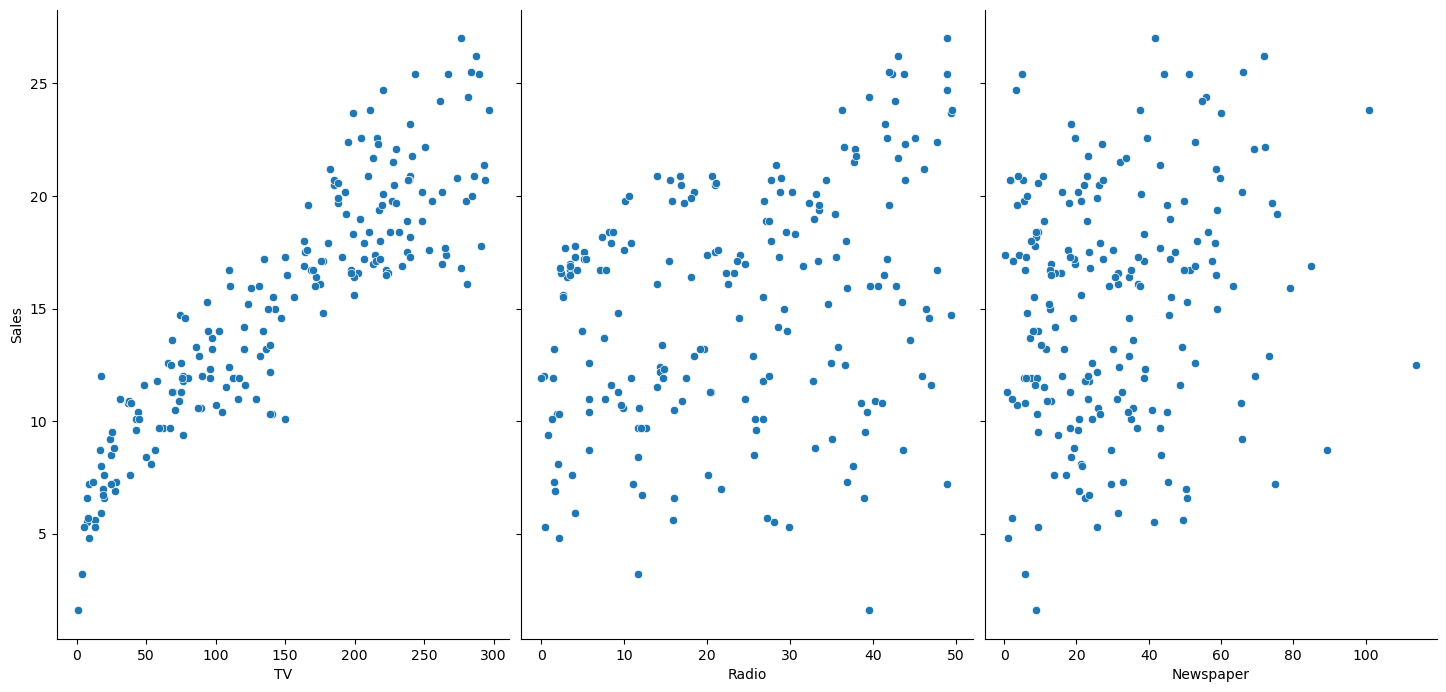

In [8]:
#Checking relationship
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=7,aspect=0.7)
plt.show()

# Outliers Detection

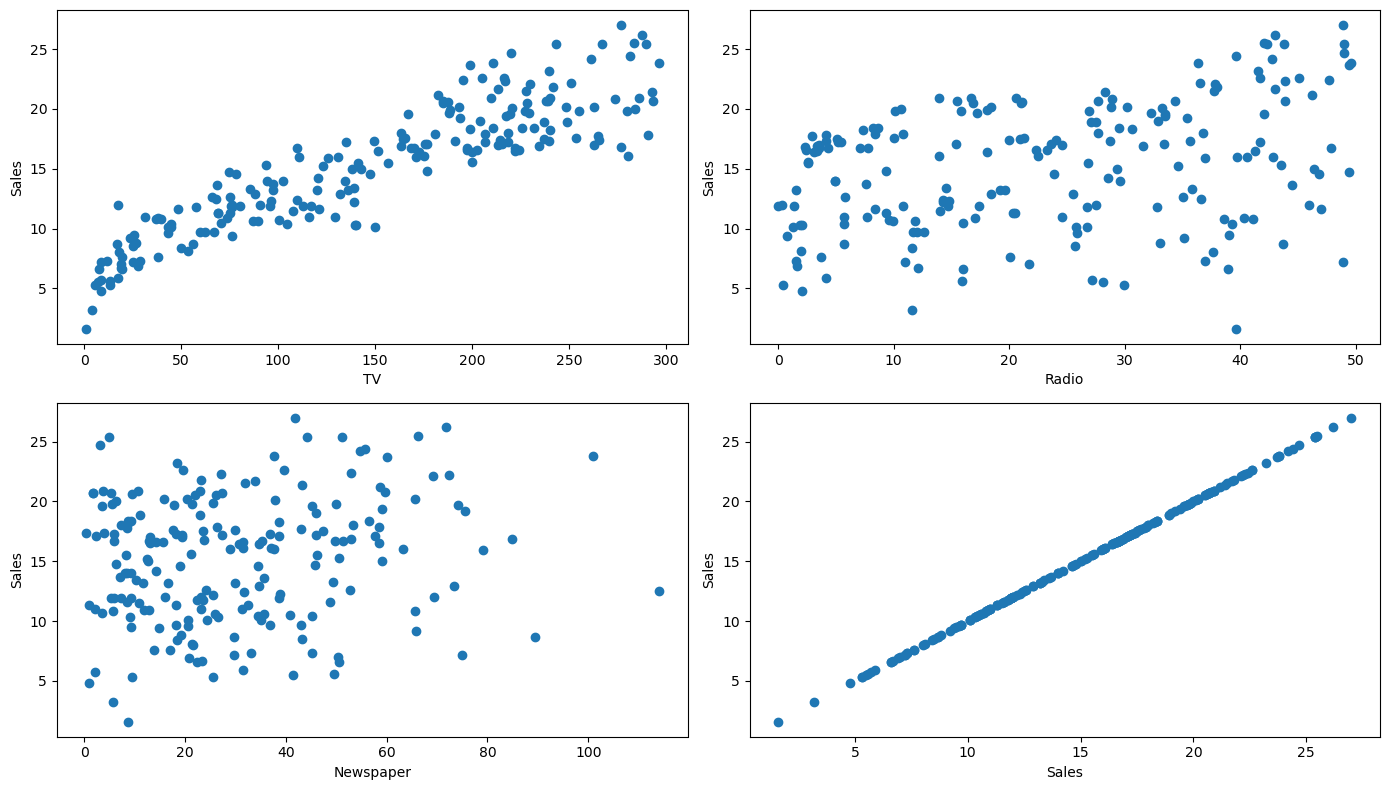

In [12]:
plt.figure(figsize=(14,8))
for i, col in enumerate(df[:-1],1):
    plt.subplot(2,2,i)
    plt.scatter(df[col],df['Sales'])
    plt.xlabel(col)
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

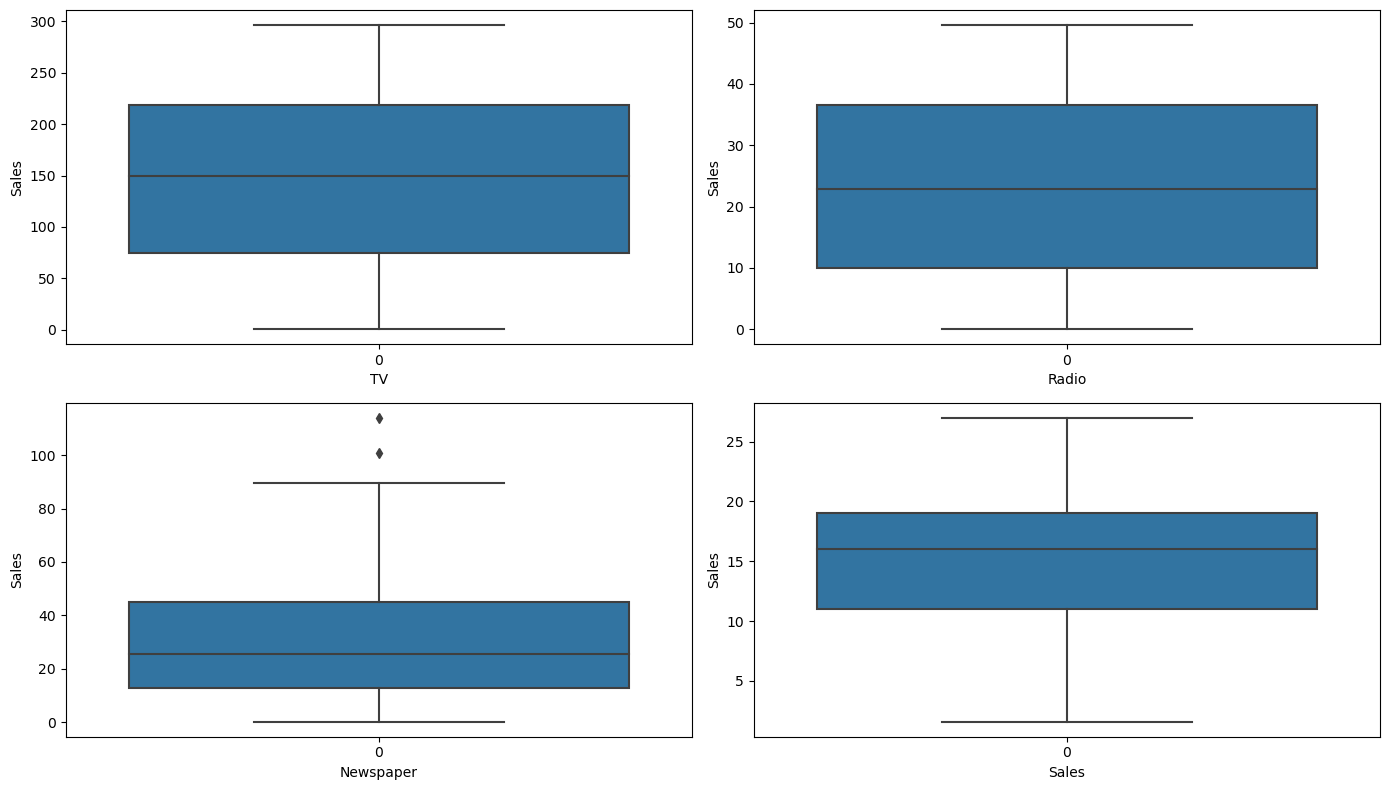

In [27]:
#outliers detection with boxplot
plt.figure(figsize=(14,8))
for i, col in enumerate(df[:-1],1):
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

C:\Users\manov\AppData\Local\Temp\ipykernel_31884\4235523445.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\manov\AppData\Local\Temp\ipykernel_31884\4235523445.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\manov\AppData\Local\Temp\ipykernel_31884\42

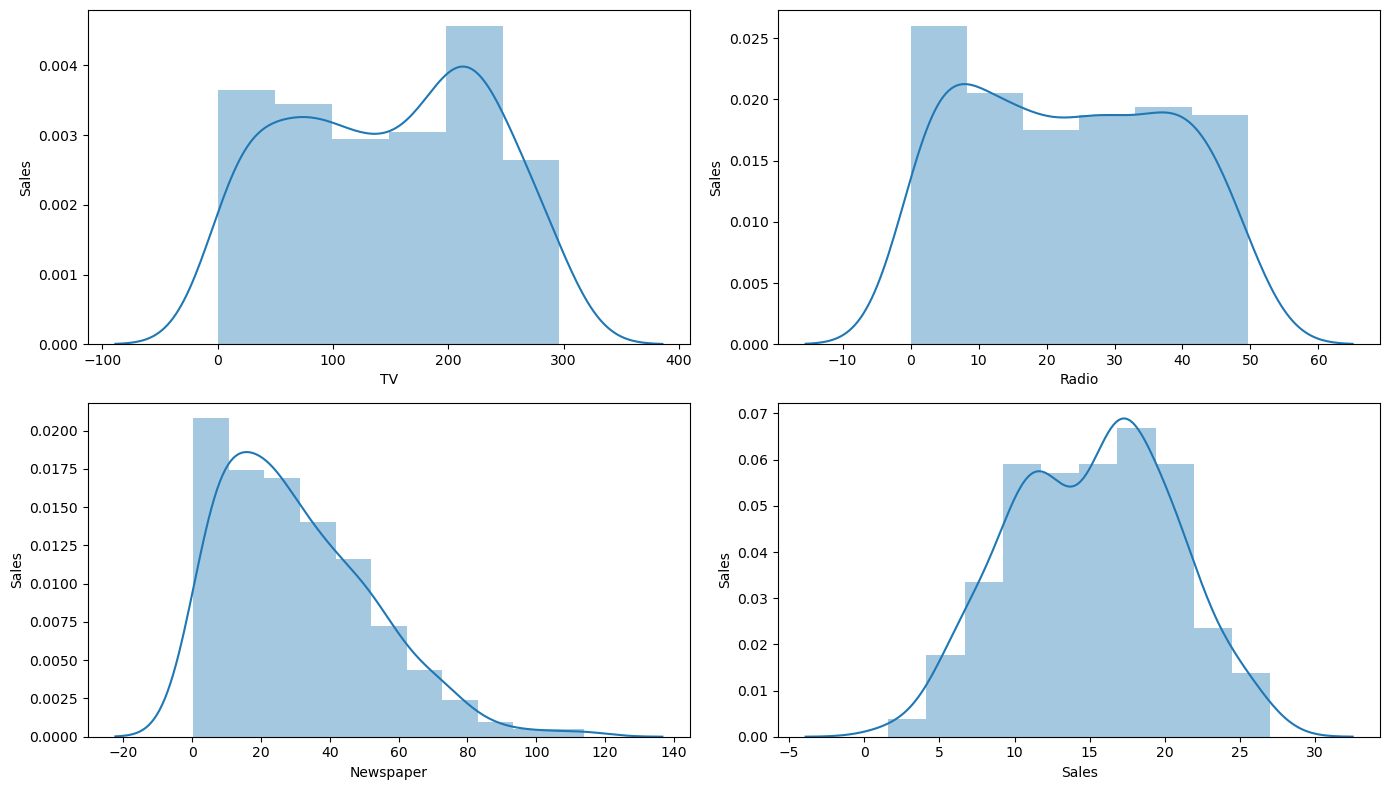

In [26]:
#outliers detection with boxplot
plt.figure(figsize=(14,8))
for i, col in enumerate(df[:-1],1):
    plt.subplot(2,2,i)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

#### outliers detection using z-Score

In [28]:
upper_limit=df['Newspaper'].mean() + 3*df['Newspaper'].std()
lower_limit=df['Newspaper'].mean() - 3*df['Newspaper'].std()
print(f'upperlimit:{upper_limit}')
print(f'lowerlimit:{lower_limit}')

upperlimit:95.8898625155685
lowerlimit:-34.7818625155685


In [30]:
df.loc[(df['Newspaper'] > upper_limit) | (df['Newspaper'] <lower_limit) ]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [35]:
new_df=df.loc[(df['Newspaper'] < upper_limit) & (df['Newspaper'] > lower_limit) ]
print(f'old_df:{len(df)}')
print(f'new_df:{len(new_df)}')
print(f'outliers:{len(df)-len(new_df)}')

old_df:200
new_df:198
outliers:2


In [34]:
new_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: >

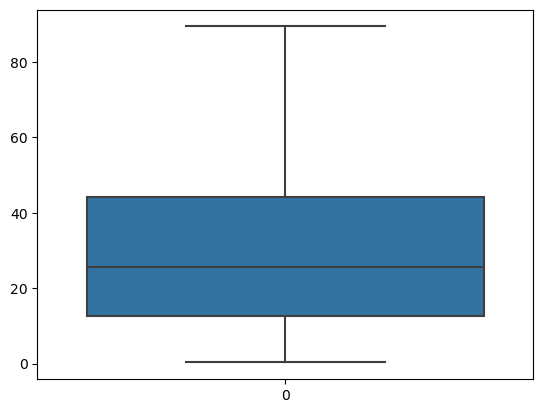

In [36]:
sns.boxplot(new_df['Newspaper'])

## Splitting Dataset into training and test

#### Model Training

In [40]:
X=new_df[['TV','Radio','Newspaper']]
y=new_df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_lin=lin_reg.predict(X_test)

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_reg.predict(X_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_reg.predict(X_test)

### Model evaluation

Linear Regression - Mean Squared Error: 2.4157289455935076
Linear Regression - R-squared: 0.9130003152798273
Decision Tree Regression - Mean Squared Error: 1.9524999999999992
Decision Tree Regression - R-squared: 0.9296829701337195
Random Forest Regression - Mean Squared Error: 1.0059910000000027
Random Forest Regression - R-squared: 0.9637703973407377


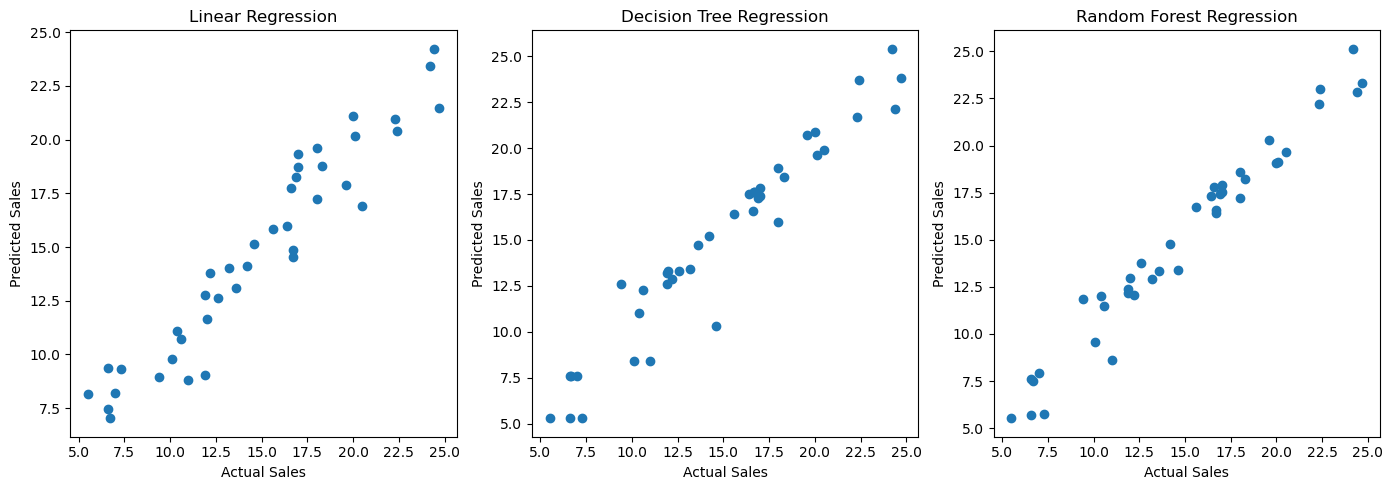

In [44]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared: {r2}")
    return mse, r2

# Linear Regression Evaluation
mse_lin, r2_lin = evaluate_model(y_test, y_pred_lin, "Linear Regression")

# Decision Tree Regression Evaluation
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")

# Random Forest Regression Evaluation
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# Plotting the predicted vs actual values for each model
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Decision Tree Regression")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest Regression")

plt.tight_layout()
plt.show()

In [45]:
import joblib

joblib.dump(rf_reg, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

# Model Creation

In [46]:
# Function to predict sales using Random Forest Regression model
def predict_sales(tv, radio, newspaper):
    # Load the trained model
    model = joblib.load('random_forest_regressor.pkl')
    
    # Create a numpy array with the input features
    features = np.array([[tv, radio, newspaper]])
    
    # Make the prediction
    predicted_sales = model.predict(features)
    
    return predicted_sales[0]

predicted_sales = predict_sales(44.5,39.3,45.1)
print(f"Predicted Sales: {predicted_sales}")

Predicted Sales: 10.458999999999993


C:\Users\manov\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
